In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rulefour(Q, const, delt, vals):
    return np.abs(Q)*np.sqrt(np.sum((const*delt/vals)**2))


'Channel A' #<<<<< BEST

testALength = [.07,.01] # [far, near] in meters 
testAVoltage = [6.65,4.5] # [V[far], V[near]] in volts

'Channel B'

testBLength = [.07,.01] # [far, near] in meters
testBVoltage = [9.15,4.27] # [V[far], V[near]] in volts

'Channel C'

testCLength = [.07,.01] # [far, near] in meters
testCVoltage = [8.15,3.71] # [V[far], V[near]] in volts

ChannelA_length = [.07,.065,.06,.055,.05,.045,.04,.035,.03,.025,.02,.015,.01]
ChannelA_voltage = [7.68, 7.64,7.47,7.35,7.13,7.07,6.98,6.83,6.48,5.93,5.65,5.17,4.53]

DV = [0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(ChannelA_voltage)):
    if(i != len(ChannelA_voltage)-1):
        DV[i] = ChannelA_voltage[i] - ChannelA_voltage[i+1]

r_mids = [0.0675,0.0625,0.0575,0.0525,0.0475,0.0425,0.0375,0.0325,0.0275,0.0225,0.0175,0.0125]
R_0 = 1.0 # meters
E_0 = 1.0 # Volts/meters
r_mids = np.array(r_mids)
ADV = [0.04, 0.17, 0.12, 0.22, 0.06, 0.09, 0.15, 0.35, 0.55, 0.28, 0.48, 0.64]
DV = np.array(ADV)
DR = .005
E=(DV/DR)
dR = 0.001

dDV = np.sqrt(0.01**2+0.01**2)
dDR = np.sqrt(0.001**2+0.001**2)

def ruleFour(Q,consts,deltas,vals):
    dQ = np.abs(Q)*np.sqrt(np.sum((consts*deltas/vals)**2))
    return dQ

const = np.array([1,-1])
delta = np.array([dDV,dDR])
val = np.array([DV,DR])

dE = ruleFour(E, const, delta, val)

y= np.log(E/E_0)
x= np.log(r_mids/R_0)

plt.figure(figsize=(15,7))
plt.plot(x,-y, 'r-')
DV = np.append(DV,DR)
#dE = rulefour(E, np.array([1,1,1,1,1,1,1,1,1,1,1,1,-1]), np.array([dDV,dDV,dDV,dDV,dDV,dDV,dDV,dDV,dDV,dDV,dDV,dDV,dDR]),DV)
dy = np.log(E + dE) - np.log(E)



print('DV =', DV)
print('E =', E)
print('dE =', dE)
print('dy =', dy)

DV = [0.04  0.17  0.12  0.22  0.06  0.09  0.15  0.35  0.55  0.28  0.48  0.64
 0.005]
E = [  8.  34.  24.  44.  12.  18.  30.  70. 110.  56.  96. 128.]
dE = [ 3.62215406 10.02397127  7.35391052 12.76244491  4.41814441  5.82408791
  8.94427191 20.         31.2409987  16.08974829 27.29981685 36.31418456]
dy = [0.37347157 0.25837376 0.26728517 0.25468529 0.31348044 0.28032541
 0.26093432 0.25131443 0.24998728 0.25256016 0.25027073 0.24975009]


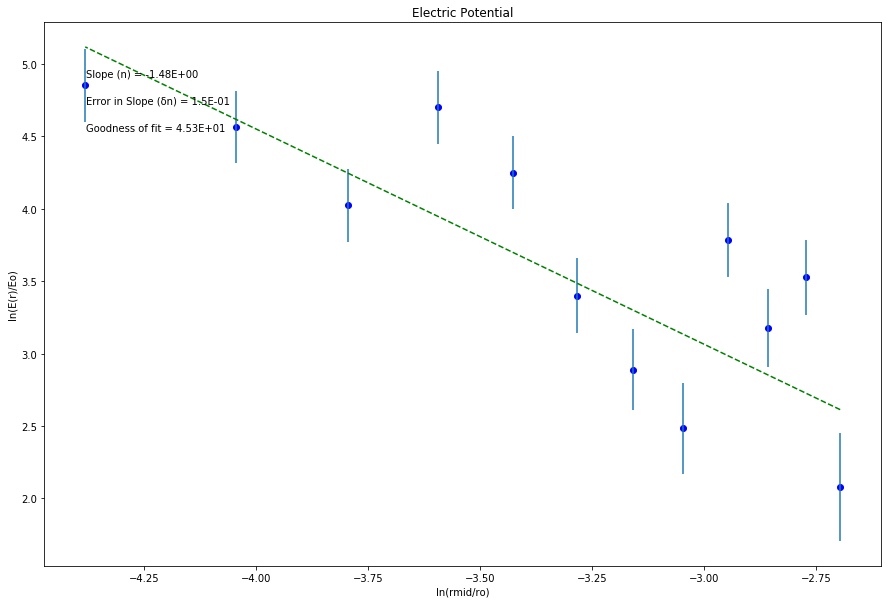

In [5]:
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic


#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('ln(rmid/ro)')
plt.ylabel('ln(E(r)/Eo)')
plt.title('Electric Potential')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (n) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (δn) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()

In [3]:
print('The slope(n) =', m, '±', dm)

The slope(n) = -1.4847957571858335 ± 0.1505554113419787
